In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

data=np.load('/content/drive/My Drive/deep_learning/Face Mask Dataset/numpyData.npy')
target=np.load('/content/drive/My Drive/deep_learning/Face Mask Dataset/numpyTarget.npy')
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [3]:
data.shape

(781, 112, 112, 1)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

num_classes = 2

model=Sequential()

model.add(Conv2D(64, (3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

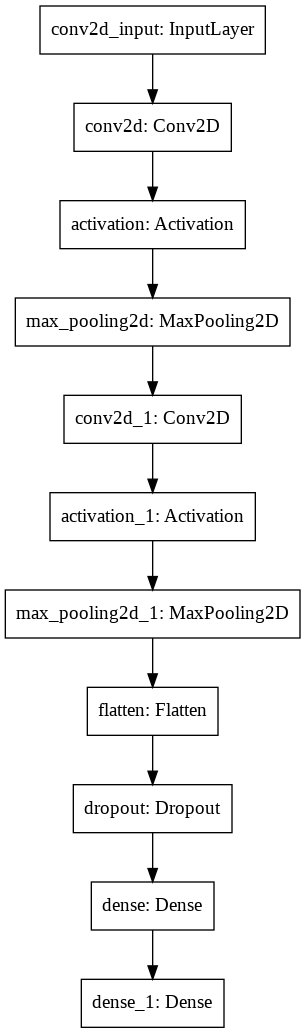

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = '/content/drive/My Drive/deep_learning/Face Mask Dataset/model_architecture.png')

In [6]:
from keras.callbacks import EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    patience=0,
    verbose=0,
    mode="auto",
    restore_best_weights=True
)

In [7]:
from keras.optimizers import Adam

epochs = 50
batch_size = 16

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
history = model.fit(train_data, train_target, batch_size = batch_size, epochs=50, validation_split = 0.25,callbacks=[callback])

Epoch 1/50
33/33 [==============================] - 1s 42ms/step - loss: 0.7298 - accuracy: 0.5703 - val_loss: 0.6654 - val_accuracy: 0.4886
Epoch 2/50
33/33 [==============================] - 1s 31ms/step - loss: 0.5708 - accuracy: 0.7053 - val_loss: 0.4345 - val_accuracy: 0.8352
Epoch 3/50
33/33 [==============================] - 1s 30ms/step - loss: 0.3787 - accuracy: 0.8422 - val_loss: 0.3270 - val_accuracy: 0.8523
Epoch 4/50
33/33 [==============================] - 1s 30ms/step - loss: 0.2404 - accuracy: 0.8859 - val_loss: 0.2931 - val_accuracy: 0.8523
Epoch 5/50
33/33 [==============================] - 1s 30ms/step - loss: 0.1549 - accuracy: 0.9449 - val_loss: 0.3058 - val_accuracy: 0.8693


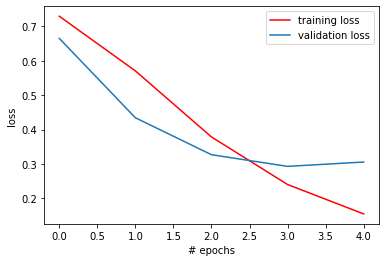

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

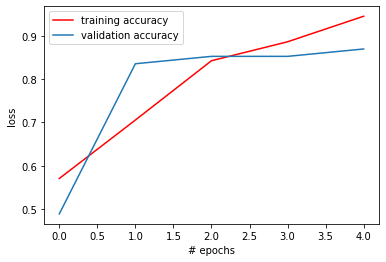

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

3/3 [==============================] - 0s 34ms/step - loss: 0.3277 - accuracy: 0.8608
[0.3276625871658325, 0.8607594966888428]


In [11]:
model.save('/content/drive/My Drive/deep_learning/Face Mask Dataset/model.h5', overwrite = True)